<a href="https://colab.research.google.com/github/imran9891/TensorFlow/blob/main/02_neural_network_classification_with_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to neural network classification with TensorFlow

In this notebook we're going to learn how to write neural networks for classification probelems.

A classification is where you try to classify something as one thing or another.

A few types of classification problems:

* Binary Classification
* Multiclass Classification
* Multilabel Classification

## Creating data to view and fit

In [1]:
from sklearn.datasets import make_circles

# Make 1000 examples
n_samples = 1000

# Create circles
X, y = make_circles(n_samples,
                    noise=0.03,
                    random_state=42)

In [2]:
make_circles()

(array([[-8.76306680e-01,  4.81753674e-01],
        [ 8.09016994e-01, -5.87785252e-01],
        [ 1.49905052e-01,  7.85829801e-01],
        [-3.09016994e-01,  9.51056516e-01],
        [ 5.02324156e-02,  7.98421383e-01],
        [ 8.00000000e-01,  0.00000000e+00],
        [ 5.02324156e-02, -7.98421383e-01],
        [ 7.74866529e-01,  1.98951910e-01],
        [-7.43821189e-01,  2.94499642e-01],
        [ 8.76306680e-01,  4.81753674e-01],
        [-9.68583161e-01,  2.48689887e-01],
        [-7.93691761e-01,  1.00266587e-01],
        [ 7.43821189e-01,  2.94499642e-01],
        [ 2.47213595e-01, -7.60845213e-01],
        [ 1.87381315e-01, -9.82287251e-01],
        [-7.74866529e-01,  1.98951910e-01],
        [ 5.35826795e-01, -8.44327926e-01],
        [ 5.83174902e-01,  5.47637685e-01],
        [ 7.28968627e-01, -6.84547106e-01],
        [ 4.28661436e-01,  6.75462340e-01],
        [-9.29776486e-01,  3.68124553e-01],
        [ 9.68583161e-01, -2.48689887e-01],
        [-1.00000000e+00, -3.216

In [3]:
# Check out features
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [4]:
# Check the labels
y

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,

Our data is a little hard to understand right now...let's visualize it!

In [5]:
import pandas as pd
circles = pd.DataFrame({"X0":X[:,0],"X1":X[:,1],"label":y})
circles

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


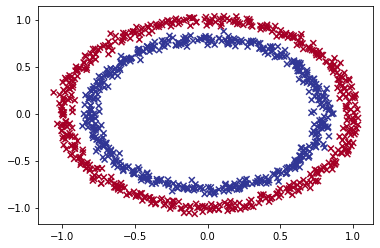

In [6]:
# Visualize with a plot
import matplotlib.pyplot as plt
plt.scatter(X[:,0],X[:,1],c=y,marker="x",cmap=plt.cm.RdYlBu);

**Exercises:** Before pushing forward, spend 10-minutes playing around with [playground.tensorflow.org] building and running different neural networks. See what happes when you change different hyperparameters.

## Input and output shapes

In [7]:
# Check the shapes of our features and labels
X.shape, y.shape

((1000, 2), (1000,))

In [8]:
# How many samples we're working with
len(X), len(y)

(1000, 1000)

In [9]:
# View the first example of features and labels
X[0], y[0]

(array([0.75424625, 0.23148074]), 1)

## Steps in modelling

The steps in modelling with TensorFlow are typically:

1. Create or import a model
2. Compile the model
3. Fit the model
4. Evaluate the model
5. Tweak
6. Evaluate

In [11]:
import tensorflow as tf

In [14]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create the model using the Sequential API
model_1 = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_1.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = tf.keras.optimizers.SGD(),
    metrics=["accuracy"]
)

# 3. Fit the model
model_1.fit(X, y,epochs=5)

Epoch 1/5
32/32 [==============================] - 1s 1ms/step - loss: 2.8544 - accuracy: 0.4600
Epoch 2/5
32/32 [==============================] - 0s 1ms/step - loss: 0.7131 - accuracy: 0.5430
Epoch 3/5
32/32 [==============================] - 0s 1ms/step - loss: 0.6973 - accuracy: 0.5090
Epoch 4/5
32/32 [==============================] - 0s 1ms/step - loss: 0.6950 - accuracy: 0.5010
Epoch 5/5
32/32 [==============================] - 0s 1ms/step - loss: 0.6942 - accuracy: 0.4830


In [15]:
# Let's try and improve our model by training for longer...
model_1.fit(X, y, epochs=200)
model_1.evaluate(X,y)

Epoch 1/200
32/32 [==============================] - 0s 1ms/step - loss: 0.6945 - accuracy: 0.4890
Epoch 2/200
32/32 [==============================] - 0s 1ms/step - loss: 0.6942 - accuracy: 0.4960
Epoch 3/200
32/32 [==============================] - 0s 992us/step - loss: 0.6947 - accuracy: 0.4470
Epoch 4/200
32/32 [==============================] - 0s 1ms/step - loss: 0.6941 - accuracy: 0.4880
Epoch 5/200
32/32 [==============================] - 0s 1ms/step - loss: 0.6940 - accuracy: 0.4800
Epoch 6/200
32/32 [==============================] - 0s 1ms/step - loss: 0.6936 - accuracy: 0.5050
Epoch 7/200
32/32 [==============================] - 0s 1ms/step - loss: 0.6943 - accuracy: 0.4970
Epoch 8/200
32/32 [==============================] - 0s 1ms/step - loss: 0.6941 - accuracy: 0.4800
Epoch 9/200
32/32 [==============================] - 0s 1ms/step - loss: 0.6940 - accuracy: 0.4830
Epoch 10/200
32/32 [==============================] - 0s 1ms/step - loss: 0.6938 - accuracy: 0.4790
Epoch 1

[0.6934829950332642, 0.5]

Since we're working on a binary classification problem and our model is getting around ~50% accuracy...it's performing as if it's guessing.

So let's step things up a notch and add an extra layer.

In [17]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create the model, this time with 2 layers
model_2 = tf.keras.Sequential([
  tf.keras.layers.Dense(1),
  tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_2.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = tf.keras.optimizers.SGD(),
    metrics=["accuracy"]
)

# 3. Fit the model
model_2.fit(X,y,epochs=100,verbose=0)

In [18]:
# 4. Evaluate the model
model_2.evaluate(X,y)

32/32 [==============================] - 0s 1ms/step - loss: 0.6933 - accuracy: 0.5000


[0.6933314800262451, 0.5]

In [19]:
circles.label.value_counts()

1    500
0    500
Name: label, dtype: int64

## Improving our model

Let's look into our bag of tricks to see how we can improve our model.

1. Create a model - we might want to add more layers or increase the number of hidden units within a layer.
2. Compiling a model - here we might want to choose a different optimization function such as Adam instad of SGD.
3. Fitting a model - perhaps we might fit our model for more epochs (leave it training for longer).

In [22]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create the model (this time 3 layers)
model_3 = tf.keras.Sequential([
  tf.keras.layers.Dense(100), # add 100 dense neurons
  tf.keras.layers.Dense(10), # add another layer with 10 neurons
  tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_3.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ["accuracy"]
)

# 3. Fit the model
model_3.fit(X, y, epochs=100,verbose=0)

In [23]:
model_2.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 1)                 3         
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 2         
Total params: 5
Trainable params: 5
Non-trainable params: 0
_________________________________________________________________


In [24]:
# 4. Evaluate the model
model_3.evaluate(X,y)

32/32 [==============================] - 0s 1ms/step - loss: 0.6980 - accuracy: 0.5080


[0.6980254650115967, 0.5080000162124634]